In [1]:
import math
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('pdf', fonttype=42)
sns.set(style="whitegrid", color_codes=True)

In [2]:
features = pd.read_parquet('../data/analysis/GANSLIDER_INTERACTIONS_FEATURES.parquet')
features

time_until_first_interaction  \
PROLIFIC_PID             taskid                               num_sliders slider_type completed                                   
568aab53316b10000d50d76b 180b159b-1518-46d4-a451-d5ed10e2b3ba 1           REGULAR     DONE      0                       31790.0   
                         199e020c-464f-432b-8c18-2fc2ff88d1bc 1           FILMSTRIP   DONE      0                        2828.0   
                         29591281-1dc6-4fcf-9019-c9f4a902b017 2           FILMSTRIP   DONE      0                        2228.0   
                         3a56c6c3-cc1c-48e5-9a50-c9a596cd3133 2           REGULAR     DONE      0                        3361.0   
                         426273e0-29b6-4018-a35b-272310692252 10          REGULAR     DONE      0                        2769.0   
...                                                                                                                         ...   
6112ce6d834ad0688ea00f1e a63c2432-8261-4490-9c50-226852ae24d1 4           FILMSTRIP   DONE      0                       17026.0   
                         cffe5c47-14b3-4445-830f-db5fa5615ecd 8           FILMSTRIP   DONE      0                       10177.0   
                         dc19fc25-3016-4545-bfef-bd3e4938188e 2           REGULAR     DONE      0                        5389.0   
                         e0f7ad98-d455-4c57-9534-5a5f463cfba8 4           REGULAR     DONE      0                       10099.0   
                         fc3c565c-bbbb-4063-b9a0-80a34c7ffab6 2           FILMSTRIP   DONE      0                        4244.0   

                                                                                                   zero_crossings  \
PROLIFIC_PID             taskid                               num_sliders slider_type completed                     
568aab53316b10000d50d76b 180b159b-1518-46d4-a451-d5ed10e2b3ba 1           REGULAR     DONE      0               2   
                         199e020c-464f-432b-8c18-2fc2ff88d1bc 1           FILMSTRIP   DONE      0               1   
                         29591281-1dc6-4fcf-9019-c9f4a902b017 2           FILMSTRIP   DONE      0              10   
                         3a56c6c3-cc1c-48e5-9a50-c9a596cd3133 2           REGULAR     DONE      0               2   
                         426273e0-29b6-4018-a35b-272310692252 10          REGULAR     DONE      0              12   
...                                                                                                           ...   
6112ce6d834ad0688ea00f1e a63c2432-8261-4490-9c50-226852ae24d1 4           FILMSTRIP   DONE      0              10   
                         cffe5c47-14b3-4445-830f-db5fa5615ecd 8           FILMSTRIP   DONE      0              54   
                         dc19fc25-3016-4545-bfef-bd3e4938188e 2           REGULAR     DONE      0               2   
                         e0f7ad98-d455-4c57-9534-5a5f463cfba8 4           REGULAR     DONE      0              21   
                         fc3c565c-bbbb-4063-b9a0-80a34c7ffab6 2           FILMSTRIP   DONE      0               7   

                                                                                                   overshoots  \
PROLIFIC_PID             taskid                               num_sliders slider_type completed                 
568aab53316b10000d50d76b 180b159b-1518-46d4-a451-d5ed10e2b3ba 1           REGULAR     DONE      0           3   
                         199e020c-464f-432b-8c18-2fc2ff88d1bc 1           FILMSTRIP   DONE      0           1   
                         29591281-1dc6-4fcf-9019-c9f4a902b017 2           FILMSTRIP   DONE      0           1   
                         3a56c6c3-cc1c-48e5-9a50-c9a596cd3133 2           REGULAR     DONE      0           3   
                         426273e0-29b6-4018-a35b-272310692252 10          REGULAR     DONE      0           3   
...                                                                               

In [3]:
conf = pd.read_parquet('../data/integrated/GANSLIDER_CONFIGS_FLAT.parquet')
conf = conf[['taskid', 'slider_id', 'target_value']].drop_duplicates()

tasks = pd.read_parquet('../data/integrated/GANSLIDER_TASKS_TRANSFORMED.parquet')
tasks = tasks[['taskid', 'start', 'end']].drop_duplicates()
tasks = tasks[~tasks.taskid.duplicated()]

df = pd.read_parquet('../data/integrated/GANSLIDER_INTERACTIONS_CONSOLIDATED.parquet')

df = df.merge(tasks, on='taskid', suffixes=["", "_y"])
df = df.merge(conf, on=['taskid', 'slider_id'])

df.loc[df['changed_slider_id'] == "START", "changed_slider_id"] = -1
df['changed_slider_id'] = df['changed_slider_id'].astype(int)
df['deviation_from_target'] = df['last_edit_value'].astype(float) - df['target_value'].astype(float)

df.sort_values(['taskid', 'start'])

,taskid,key,slider_id,last_edit_value,first_edit_value,changed_slider_id,start,end,edit_value_count,distinct_edit_values,action_type,PROLIFIC_PID,num_sliders,slider_type,GROUP,completed,start_y,end_y,target_value,deviation_from_target
148727,0024922e-53cb-43ce-9e3d-746bac2ad866,1626975595217_START,0,0.0,0.0,-1,1626975595217,1626975595350,11,1,CLICK,60f9178bf158140ffcd6ecf8,10,FILMSTRIP,B,DONE,1626975584320,1626975882957,2.0,-2.0
148815,0024922e-53cb-43ce-9e3d-746bac2ad866,1626975595217_START,1,0.0,0.0,-1,1626975595217,1626975595350,11,1,CLICK,60f9178bf158140ffcd6ecf8,10,FILMSTRIP,B,DONE,1626975584320,1626975882957,4.4,-4.4
148903,0024922e-53cb-43ce-9e3d-746bac2ad866,1626975595217_START,2,0.0,0.0,-1,1626975595217,1626975595350,11,1,CLICK,60f9178bf158140ffcd6ecf8,10,FILMSTRIP,B,DONE,1626975584320,1626975882957,-0.6,0.6
148991,0024922e-53cb-43ce-9e3d-746bac2ad866,1626975595217_START,3,0.0,0.0,-1,1626975595217,1626975595350,11,1,CLICK,60f9178bf158140ffcd6ecf8,10,FILMSTRIP,B,DONE,1626975584320,1626975882957,1.6,-1.6
149079,0024922e-53cb-43ce-9e3d-746bac2ad866,1626975595217_START,4,0.0,0.0,-1,1626975595217,1626975595350,11,1,CLICK,60f9178bf158140ffcd6ecf8,10,FILMSTRIP,B,DONE,1626975584320,1626975882957,-1.6,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201000,ffb40708-446e-4faa-a5c3-2fde69e7fc1f,1628691149948_0,3,-2.0,-2.0,0,1628691149948,1628691150759,14,1,DRAG,6109907b6f1fe1d30a251e7e,8,FILMSTRIP,A,DONE,1628690968734,1628691169532,-4.6,2.6
201065,ffb40708-446e-4faa-a5c3-2fde69e7fc1f,1628691149948_0,4,-4.0,-4.0,0,1628691149948,1628691150759,14,1,DRAG,6109907b6f1fe1d30a251e7e,8,FILMSTRIP,A,DONE,1628690968734,1628691169532,-1.5,-2.5
201130,ffb40708-446e-4faa-a5c3-2fde69e7fc1f,1628691149948_0,5,-1.9,-1.9,0,1628691149948,1628691150759,14,1,DRAG,6109907b6f1fe1d30a251e7e,8,FILMSTRIP,A,DONE,1628690968734,1628691169532,-1.0,-0.9
201195,ffb40708-446e-4faa-a5c3-2fde69e7fc1f,1628691149948_0,6,0.2,0.2,0,1628691149948,1628691150759,14,1,DRAG,6109907b6f1fe1d30a251e7e,8,FILMSTRIP,A,DONE,1628690968734,1628691169532,2.7,-2.5


In [4]:
# def zero_crossings(grp):
# 	grp = grp.sort_values('start')
# 	num_zero_crossings = grp.groupby('slider_id')['last_edit_value'].apply(lambda arr: sum(np.diff(np.sign(arr) != 0))).sum()
# 	return num_zero_crossings

# def slider_switches(grp):
#   ids = grp[['start', 'changed_slider_id']].drop_duplicates()
#   ids = ids.sort_values('start')['changed_slider_id']
#   num_slider_switches = max(sum(np.diff(ids) != 0) - 1, 0)
#   return num_slider_switches

# def overshoots(grp):
#   grp = grp.sort_values('start')

#   # print(grp[['start', 'slider_id', 'deviation_from_target', 'last_edit_value', 'target_value']])
#   # grp.groupby('slider_id')['deviation_from_target'].apply(lambda arr: print(np.sum(np.diff(np.sign(arr)) != 0)))
#   num_overshoots = grp.groupby('slider_id')['deviation_from_target'].apply(lambda arr: sum(np.diff(np.sign(arr)) != 0)).sum()


#   # raise Exception()
#   return num_overshoots

# def num_interactions(grp):
# 	return grp['start'].drop_duplicates().shape[0]

# def get_counts(grp):
#   res = grp[['start', 'action_type']].drop_duplicates()['action_type'].value_counts()
#   return res

# def get_milliseconds(grp):
#   trange = int(grp['end'].max() - grp['start'].min())
#   trange = int(trange)
#   return trange

# def time_until_first_interaction(grp):
#   return max(0, float(grp['start'].min()) - float(grp['start_y'].min()))

# def extract_features(grp):
#   out = pd.DataFrame()
#   out['time_until_first_interaction'] = [time_until_first_interaction(grp)]
#   out['zero_crossings'] = [zero_crossings(grp)]
#   out['overshoots'] = [overshoots(grp)]
#   out['slider_switches'] = [slider_switches(grp)]
#   out['num_interactions'] = [num_interactions(grp)]
#   return out	

# features = df.groupby(['PROLIFIC_PID', 'taskid', 'num_sliders', 'slider_type', 'completed']).apply(extract_features)
# features

                         count       mean        std    min      25%      50%  \
slider_type num_sliders                                                         
FILMSTRIP   1            138.0  20.277594  36.305102  2.053  5.88100  10.4330   
            2            138.0  12.436746  14.909487  2.228  5.50075   8.5200   
            3            138.0  16.494268  49.246763  1.845  6.09525   8.2805   
            4            138.0  14.236783  13.989128  1.791  6.64950  10.2040   
            5            137.0  18.109350  30.683933  1.969  7.58800  11.2280   
            8            138.0  19.140377  29.292316  0.000  7.69625  12.4645   
            10           138.0  18.974268  20.325313  1.219  9.24525  14.4345   
REGULAR     1            137.0  28.147730  96.592726  1.383  7.07700  12.9800   
            2            137.0  16.336139  51.997417  0.000  4.54600   7.5300   
            3            137.0  14.941350  54.905006  0.000  4.21300   6.3250   
            4            137

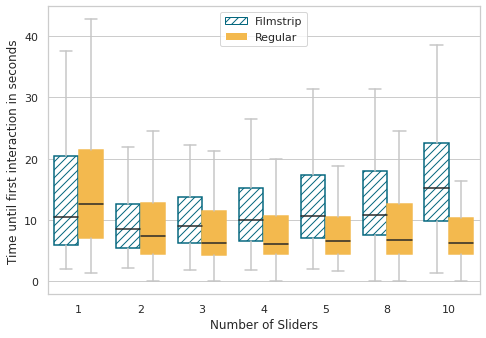

In [10]:
test = features.reset_index()
test['time_until_first_interaction'] = test['time_until_first_interaction'].astype(int).apply(lambda val: max(0, val))
test['time_until_first_interaction'] = test['time_until_first_interaction'] / 1000

sns.set(style="whitegrid", color_codes=True)

print(test.groupby(['slider_type', 'num_sliders'])['time_until_first_interaction'].describe())

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bar = sns.boxplot(data=test[test.completed=="DONE"], x='num_sliders', y='time_until_first_interaction', hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'], palette=['#F3B94E', "#04677E"], showfliers=False, ax=ax)
ax.legend([], [], frameon=False)

# Define some hatches
hatches = ['///', '']

# Loop over the bars
for i,box in enumerate(bar.artists):
    box.set_edgecolor('#F3B94E'if i%2 else "#04677E" )
    box.set_facecolor('#F3B94E'if i%2 else "white" )
    # box.set_facecolor('white')
    
    # Set a different hatch for each bar
    box.set_hatch(hatches[ i % 2])

for j, line in enumerate(bar.lines):
        if j % 5 != 4:
            line.set_color("#C6C6C6")

plt.xlabel('Number of Sliders')
plt.ylabel('Time until first interaction in seconds')

patches = [
    matplotlib.patches.Patch( edgecolor="#04677E", hatch=r'///',label='Filmstrip', fill=False),
    matplotlib.patches.Patch( facecolor='#F3B94E', hatch=r'',label='Regular', fill=True),
]

ax.legend(handles=patches)
plt.savefig('../images/Figure3d_time_until_first_interaction.pdf', bbox_inches='tight')

# plt.figure()
# g = sns.boxplot(data=test[test.completed=="DONE"], x='num_sliders', y='time_until_first_interaction', showfliers=False, hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'], palette=['#6CA1AD', '#F3B94E'])
# plt.title('Time Until First Interaction in seconds - Task DONE')

# plt.figure()
# sns.boxplot(data=test[test.completed=="GIVEUP"], x='num_sliders', y='time_until_first_interaction', showfliers=False, hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'], palette=['#6CA1AD', '#F3B94E'])
# plt.title('Time Until First Interaction in seconds - Task GIVEUP')

count    1917.000000
mean       65.452791
std        79.311800
min         1.000000
25%        18.000000
50%        38.000000
75%        80.000000
max       832.000000
Name: num_interactions, dtype: float64


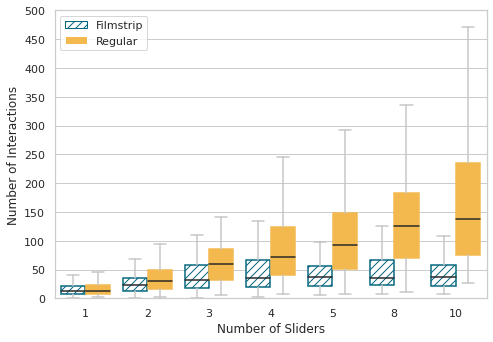

In [13]:
test = features.reset_index()
test.num_interactions = test.num_interactions

print(test.num_interactions.describe())

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bar = sns.boxplot(data=test[test.completed=="DONE"], x='num_sliders', y='num_interactions', hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'], palette=['#F3B94E', "#04677E"], showfliers=False, ax=ax)
ax.legend([], [], frameon=False)

# Define some hatches
hatches = ['///', '']

# Loop over the bars
for i,box in enumerate(bar.artists):
    box.set_edgecolor('#F3B94E'if i%2 else "#04677E" )
    box.set_facecolor('#F3B94E'if i%2 else "white" )
    # box.set_facecolor('white')
    
    # Set a different hatch for each bar
    box.set_hatch(hatches[ i % 2])

for j, line in enumerate(bar.lines):
    if j % 5 != 4:
        line.set_color("#C6C6C6")

plt.ylim((0, 500))
plt.yticks(np.linspace(0, 500, num=11))
plt.xlabel('Number of Sliders')
plt.ylabel('Number of Interactions')

patches = [
    matplotlib.patches.Patch( edgecolor="#04677E", hatch=r'///',label='Filmstrip', fill=False),
    matplotlib.patches.Patch( facecolor='#F3B94E', hatch=r'',label='Regular', fill=True),
]

ax.legend(handles=patches)
plt.savefig('../images/Figure3a_num_interactions.pdf', bbox_inches='tight')

                         count       mean        std  min   25%   50%    75%  \
slider_type num_sliders                                                        
FILMSTRIP   1            138.0   2.079710   1.538136  0.0   1.0   2.0   2.75   
            2            138.0   4.869565   3.507710  0.0   2.0   4.0   6.75   
            3            138.0   6.724638   4.567048  0.0   4.0   5.5   8.00   
            4            138.0   8.963768   8.184380  0.0   5.0   7.0  10.00   
            5            137.0   9.934307   7.331644  0.0   5.0   8.0  13.00   
            8            138.0  13.311594   9.863152  0.0   7.0  10.0  16.00   
            10           138.0  11.739130  10.160970  0.0   7.0   9.0  14.75   
REGULAR     1            137.0   1.357664   1.433513  0.0   0.0   1.0   2.00   
            2            137.0   5.547445   4.140849  0.0   3.0   4.0   7.00   
            3            137.0  10.554745   6.927057  0.0   6.0   9.0  14.00   
            4            137.0  16.70802

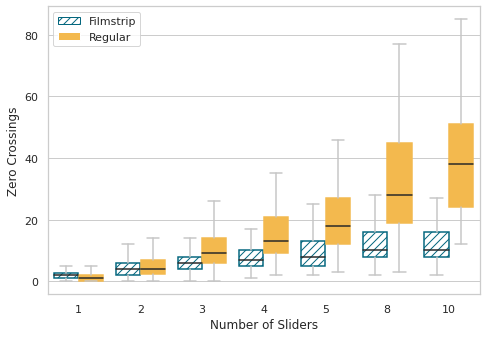

In [8]:
import seaborn as sns

test = features.reset_index()
print(test.groupby(['slider_type', 'num_sliders'])['zero_crossings'].describe())


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bar = sns.boxplot(data=test[test.completed=="DONE"], x='num_sliders', y='zero_crossings', hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'], palette=['#F3B94E', "#04677E"], showfliers=False, ax=ax)
ax.legend([], [], frameon=False)

# Define some hatches
hatches = ['///', '']

# Loop over the bars
for i,box in enumerate(bar.artists):
    box.set_edgecolor('#F3B94E'if i%2 else "#04677E" )
    box.set_facecolor('#F3B94E'if i%2 else "white" )
    # box.set_facecolor('white')
    
    # Set a different hatch for each bar
    box.set_hatch(hatches[ i % 2])

for j, line in enumerate(bar.lines):
    if j % 5 != 4:
        line.set_color("#C6C6C6")

plt.xlabel('Number of Sliders')
plt.ylabel('Zero Crossings')

patches = [
    matplotlib.patches.Patch( edgecolor="#04677E", hatch=r'///',label='Filmstrip', fill=False),
    matplotlib.patches.Patch( facecolor='#F3B94E', hatch=r'',label='Regular', fill=True),
]

ax.legend(handles=patches)
plt.savefig('../images/Figure3c_zero_crossings.pdf', bbox_inches='tight')

# plt.figure()
# sns.boxplot(data=test[test.completed=="DONE"], x='num_sliders', y='zero_crossings', hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'])
# plt.ylim((0, 30))
# plt.title('Zero Crossing - Task DONE')

# plt.figure()
# sns.boxplot(data=test[test.completed=="GIVEUP"], x='num_sliders', y='zero_crossings', hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'])
# plt.ylim((0, 30))
# plt.title('Zero Crossing - Task GIVEUP')

count    1917.000000
mean        9.072509
std        12.055390
min         0.000000
25%         2.000000
50%         6.000000
75%        12.000000
max       202.000000
Name: slider_switches, dtype: float64


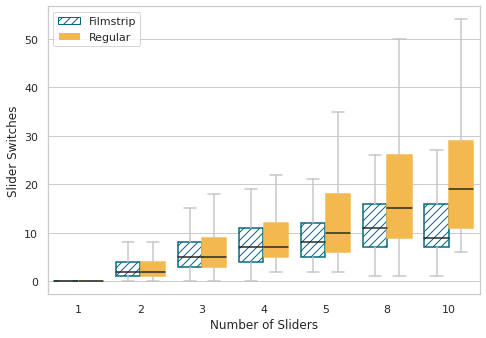

In [7]:
import seaborn as sns

test = features.reset_index()

print(test.slider_switches.describe())

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bar = sns.boxplot(data=test[test.completed=="DONE"], x='num_sliders', y='slider_switches', hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'], palette=["#F3B94E", "#04677E"], showfliers=False, ax=ax)
ax.legend([], [], frameon=False)

# Define some hatches
hatches = ['///', '']

# Loop over the bars
for i,box in enumerate(bar.artists):
    box.set_edgecolor('#F3B94E'if i%2 else "#04677E" )
    box.set_facecolor('#F3B94E'if i%2 else "white" )
    # box.set_facecolor('white')
    
    # Set a different hatch for each bar
    box.set_hatch(hatches[ i % 2])

for j, line in enumerate(bar.lines):
    if j % 5 != 4:
        line.set_color("#C6C6C6")

plt.xlabel('Number of Sliders')
plt.ylabel('Slider Switches')

patches = [
    matplotlib.patches.Patch( edgecolor="#04677E", hatch=r'///',label='Filmstrip', fill=False),
    matplotlib.patches.Patch( facecolor='#F3B94E', hatch=r'',label='Regular', fill=True),
]

ax.legend(handles=patches)
plt.savefig('../images/Figure3b_slider_switches.pdf', bbox_inches='tight')

# plt.figure()
# sns.boxplot(data=test[test.completed=="DONE"], x='num_sliders', y='slider_switches', hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'])
# plt.ylim((0, 100))
# plt.title('Slider Switches - Task DONE')

# plt.figure()
# sns.boxplot(data=test[test.completed=="GIVEUP"], x='num_sliders', y='slider_switches', hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'])
# plt.ylim((0, 100))
# plt.title('Slider Switches - Task GIVEUP')

count    1917.000000
mean        9.729786
std        12.986464
min         0.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       191.000000
Name: overshoots, dtype: float64


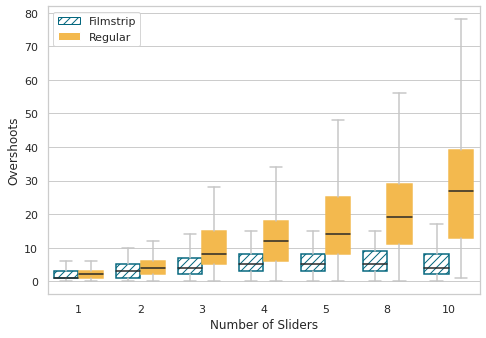

In [8]:
import seaborn as sns

test = features.reset_index()

print(test.overshoots.describe())

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bar = sns.boxplot(data=test[test.completed=="DONE"], x='num_sliders', y='overshoots', hue='slider_type', hue_order=['FILMSTRIP', 'REGULAR'], palette=["#F3B94E", "#04677E"], showfliers=False, ax=ax)
ax.legend([], [], frameon=False)

# Define some hatches
hatches = ['///', '']

# Loop over the bars
for i,box in enumerate(bar.artists):
    box.set_edgecolor('#F3B94E'if i%2 else "#04677E" )
    box.set_facecolor('#F3B94E'if i%2 else "white" )
    # box.set_facecolor('white')
    
    # Set a different hatch for each bar
    box.set_hatch(hatches[ i % 2])

for j, line in enumerate(bar.lines):
    if j % 5 != 4:
        line.set_color("#C6C6C6")

plt.xlabel('Number of Sliders')
plt.ylabel('Overshoots')

patches = [
    matplotlib.patches.Patch( edgecolor="#04677E", hatch=r'///',label='Filmstrip', fill=False),
    matplotlib.patches.Patch( facecolor='#F3B94E', hatch=r'',label='Regular', fill=True),
]

ax.legend(handles=patches)

plt.savefig('../images/Figure3b_overshoots.pdf', bbox_inches='tight')